# Dataset

The purpose of this project is to build the best suited classifier model to classify 10
categories of grayscale fashion images: top, trouser, pullover, dress, coat, sandal, shirt,
sneaker, bag and boot. The dataset used ‘train.csv’ is a subset of the original
Fashion-MNIST dataset, it contains 30,000 examples of 28x28 sized images. A ‘test.csv’ file
with 5,000 images without labels was also used to assess model accuracy against the unit cohort

In [11]:
#Importing Libraries

import pandas as pd
import os
pd.set_option('display.max_columns', 10)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn. ensemble import RandomForestClassifier, BaggingRegressor, AdaBoostRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [2]:
#uploading the train data set with label included
data_train_df = pd.read_csv('train.csv')


In [3]:
# Describe training dataset
data_train_df.describe()
# standard deviation across features show quite a range which indicates scaling is required.

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,0.000933,0.005133,0.031233,0.078367,...,8.601267,2.735700,0.841333,0.065533,4.492500
std,8660.398374,0.092011,0.205366,0.964377,1.809475,...,29.541150,17.315959,9.257715,1.883726,2.868534
min,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000
50%,14999.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000
75%,22499.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000
max,29999.000000,14.000000,25.000000,119.000000,146.000000,...,250.000000,255.000000,255.000000,163.000000,9.000000


In [4]:
# PRE-PROCESSING

# only selecting the input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

#output label
data_train_label = data_train_df.label.to_numpy()

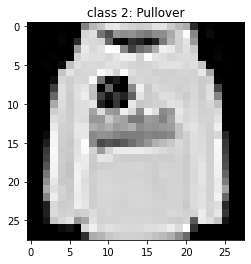

In [5]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 
28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

In [6]:
# Test input without labels

data_test_df = pd.read_csv('test_input.csv')
data_test_df_ = data_test_df.drop("id", axis = 1)

## 1. PRE-PROCESSING

In [7]:
#Reshaping the data

data_train_feature_X = data_train_feature.reshape((data_train_feature.shape[0],
                                                   data_train_feature.shape[1]*data_train_feature.shape[2]))

print("X shape:",data_train_feature_X.shape)

X shape: (30000, 784)


In [8]:
# Train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train_feature_X, data_train_label, 
                                                    test_size=0.25, random_state=0)

Prior to training our models against our dataset, the data must be pre-processed. By
observing the standard deviation across the features, the vast range of figures meant that
the data needed to be scaled. This was done by using the MinMaxScaler function from the
SkLearn Preprocessing library. The input features were thereby normalised to ensure a
similar data distribution and the reduction of values will also aid in a faster speed during
model training.

In [9]:
#Normalizing the data

from sklearn.preprocessing import MinMaxScaler
scalling = MinMaxScaler()
scalling.fit_transform(X_train)
X_train_s = scalling.transform(X_train)
X_test_s = scalling.transform(X_test)
X_test_output = scalling.transform(data_test_df_)

C:\Users\ericp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


After normalisation, PCA was used to compress the images by reducing the
large number of features and finding a lower dimensional representation which will improve
the speed of the process as it converges faster. To preserve 95% data variance, the number of features were reduced by ~76% from 784 to
186

In [10]:
#Applying PCAA on the normalised data

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit_transform(X_train_s)
X_train_pca_s = pca.transform(X_train_s)
X_test_pca_s = pca.transform(X_test_s)
X_test_output_pca = pca.transform(X_test_output)

# 2. Model Selection

###  SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm that is used for
classification or regression tasks. SVM finds a hyperplane that has the maximum margin in a
186-dimensional space in this instance to classify the new data points.

In [10]:
#Classifying with SVM
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma="auto")
svm.fit(X_train_pca_s, y_train)
y_predicting = svm.predict(X_test_pca_s)
print("SVM accuracy: {:.3f}".format(accuracy_score(y_test, y_predicting)))

SVM accuracy: 0.856


The SVM model was initially set with the Radial Basis Function (RBF) kernel and the gamma parameter set on “auto”. The accuracy of the initial prediction
produced a result of 86%. To improve the accuracy of the model, the C value, gamma and
kernel selection could be tuned. For this reason, the following selections were inputted for
the grid search to find the best estimators for the model. The grid search specified the best parameters to be: C = 10, gamma = 0.01 and kernel = rbf,
which produced an accuracy score of 89%.

In [12]:
#HYPERPARAMETER TUNING

#Grid search for SVM
param_grid = {'C': [0.001,0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': 
              ['rbf', 'poly', 'sigmoid']}

grid_searching = GridSearchCV(SVC(),param_grid, refit=True, n_jobs=-1, verbose=2)
grid_searching.fit(X_train_pca_s,y_train)

svm_hyper_score = grid_searching.score(X_test_pca_s, y_test)
print("Accuracy: {:.2f}".format(grid_searching.score(X_test_pca_s, y_test)))
print("Best parameters specification: {}".format(grid_searching.best_params_))
print(grid_searching.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Accuracy: 0.89
Best parameters specification: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [71]:
# RESULTS
#Checking classification results for SVM

SVM_predict = grid_searching.predict(X_test_pca_s)
print("Results:\n{}".format(metrics.classification_report(y_test, SVM_predict)))

Results:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       735
           1       0.99      0.97      0.98       748
           2       0.80      0.80      0.80       760
           3       0.89      0.90      0.90       770
           4       0.80      0.85      0.82       755
           5       0.96      0.95      0.95       758
           6       0.75      0.67      0.71       761
           7       0.93      0.96      0.94       781
           8       0.97      0.97      0.97       742
           9       0.96      0.94      0.95       690

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



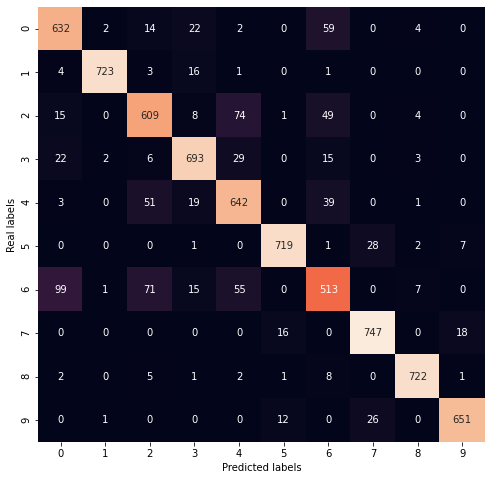

In [51]:
#Visuallizing the accuracy of SVM tuned model
SVM_predict = grid_searching.predict(X_test_pca_s)

visualisation = pd.crosstab(y_test, SVM_predict, 
                               rownames=['Real labels'], colnames=['Predicted labels'])
plot = plt.figure(figsize=(8,8));
plot = sns.heatmap(visualisation, annot=True, fmt="d", cbar=False)

In [58]:
#Calculating average time for SVM gridsearch

mean_fit_time = grid_searching.cv_results_['mean_fit_time']
mean_score_time= grid_searching.cv_results_['mean_score_time']
n_splits  = grid_searching.n_splits_ 
n_iter = pd.DataFrame(grid_searching.cv_results_).shape[0] 
svm_average_time = np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter

print("Average running time: {:.2f}".format(svm_average_time))

Average running time: 54677.59


### Logistic Regression

While running the model, the number of interactions had to be increased to 2000 as the
solver was failing to converge. After running and fitting the model in the training set, it
presented a relatively high accuracy of 84% compared to other models

In [23]:
#logistic regression model

log_regression = LogisticRegression(max_iter = 2000)
log_regression.fit(X_train_pca_s, y_train)
log_y_pred = log_regression.predict(X_test_pca_s)
print("Logistic accuracy: {:.3f}".format(accuracy_score(y_test, log_y_pred)))
#print("Accuracy on test:", log_regression.score(X_test_pca_s, y_test)*100)

Logistic Regression accuracy: 0.844


Grid search was
used to improve generalisation performance and identify the best hyperparameters for the
model as it goes through all possible combinations to find the best accuracy. Therefore, a set
of parameters were defined such as penalty(L1 and L2) and C values with numpy log space
to return numbers spaced evenly on a log scale. After running the gridsearch for logistic
regression, the accuracy significantly increased from 84% to 85% with the best parameters
defined as C = 1.0 and penalty = L2

In [25]:
#HYPERPARAMETER TUNING
#Gridsearch for Logistic Regression

param = {'penalty':['l1', 'l2'],
                'C':np.logspace(0, 3, 7)
                }
classifier_log = LogisticRegression(max_iter = 2000, n_jobs=-1)

gridSearchCV = GridSearchCV(classifier_log, param, cv=10, verbose=1)
gridSearchCV.fit(X_train_pca_s, y_train)

log_hyper_score = gridSearchCV.score(X_test_pca_s, y_test)
print("Best parameters specification")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("Accuracy:{:.2f}".format(gridSearchCV.score(X_test_pca_s, y_test)))

Fitting 10 folds for each of 14 candidates, totalling 140 fits


C:\Users\ericp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ericp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ericp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ericp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best parameters specification
{'C': 1.0, 'penalty': 'l2'}
0.8498222222222223
Accuracy:0.84


In [70]:
#RESULTS
#Checking classification results for logistic regression

log_predict = gridSearchCV.predict(X_test_pca_s)
print("Results:\n{}".format(metrics.classification_report(y_test, log_predict)))

Results:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       735
           1       0.97      0.96      0.96       748
           2       0.75      0.73      0.74       760
           3       0.86      0.88      0.87       770
           4       0.74      0.79      0.77       755
           5       0.92      0.90      0.91       758
           6       0.63      0.57      0.60       761
           7       0.90      0.93      0.92       781
           8       0.94      0.94      0.94       742
           9       0.94      0.93      0.94       690

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.84      0.84      0.84      7500



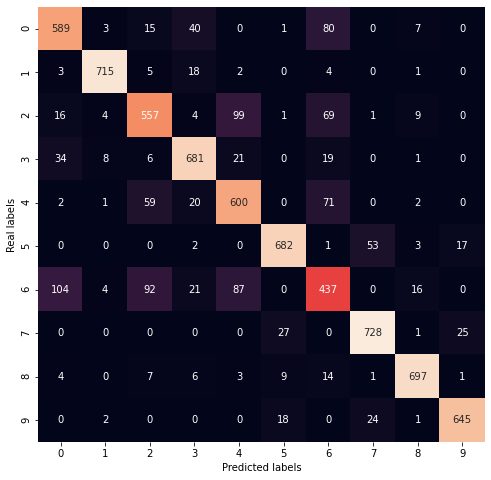

In [49]:
#Visualisation of the accuracy of the logistic regression tuned model
log_predict = gridSearchCV.predict(X_test_pca_s)

visualisation = pd.crosstab(y_test, log_predict, 
                               rownames=['Real labels'], colnames=['Predicted labels'])
p = plt.figure(figsize=(8,8));
p = sns.heatmap(visualisation, annot=True, fmt="d", cbar=False)

In [59]:
#Calculating average time for Logistic regression grid search

mean_fit_time = gridSearchCV.cv_results_['mean_fit_time']
mean_score_time= gridSearchCV.cv_results_['mean_score_time']
n_splits  = gridSearchCV.n_splits_ 
n_iter = pd.DataFrame(gridSearchCV.cv_results_).shape[0] 
log_average_time = np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter

print("Average running time: {:.2f}".format(log_average_time))

Average running time: 3581.65


### KNN

K Nearest Neighbour (kNN) is a supervised learning algorithm that is widely used for
classification problems. The accuracy of the prediction results using the kNN algorithm with k = 3 initially produced
84%.

In [20]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

K_model = KNeighborsClassifier(n_neighbors=3)
K_model.fit(X_train_pca_s, y_train)
y_predict = K_model.predict(X_test_pca_s)

print("Accuracy: ", K_model.score(X_test_pca_s, y_test)*100)

Accuracy:  84.06666666666666


Using GridSearchCV once again to have
the model run several times with different parameter values to compare results, k neighbours
1, 3, 5, 11, 15 and 18 were listed, as well as both options of the distance formula (p = 1 ,2). After running the grid search with 10 folds, the best parameters were k = 5 and the
Euclidean distance. These settings produced a slightly higher score which rounded the
accuracy to 85%

In [21]:
#HYPERPARAMETER TUNING
#Grid search for KNeighborsClassifier

param_grid = {'n_neighbors': [1, 3, 5, 11, 15, 18],
              'p': [1, 2]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          return_train_score=True, n_jobs=-1, verbose=40)

grid_search.fit(X_train_pca_s, y_train)

knear_hyper_score = grid_search.score(X_test_pca_s, y_test)
print("Accuracy: {:.2f}".format(grid_search.score(X_test_pca_s, y_test)))
print("The best parameters details: {}".format(grid_search.best_params_))
print("The best score: {:.2f}".format(grid_search.best_score_))
print("The best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 3, 5, 11, 15, 18], 'p': [1, 2]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Accuracy: 0.85
The best parameters details: {'n_neighbors': 5, 'p': 2}
The best score: 0.85
The best estimator:
KNeighborsClassifier()


In [72]:
#Checking classification results for KNeighborsClassifier

KN_predict = grid_search.predict(X_test_pca_s)
print("Results:\n{}".format(metrics.classification_report(y_test, KN_predict)))

Results:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       735
           1       0.99      0.95      0.97       748
           2       0.71      0.76      0.73       760
           3       0.90      0.85      0.87       770
           4       0.74      0.78      0.76       755
           5       0.99      0.86      0.92       758
           6       0.65      0.56      0.60       761
           7       0.89      0.95      0.92       781
           8       0.98      0.96      0.97       742
           9       0.90      0.96      0.93       690

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500



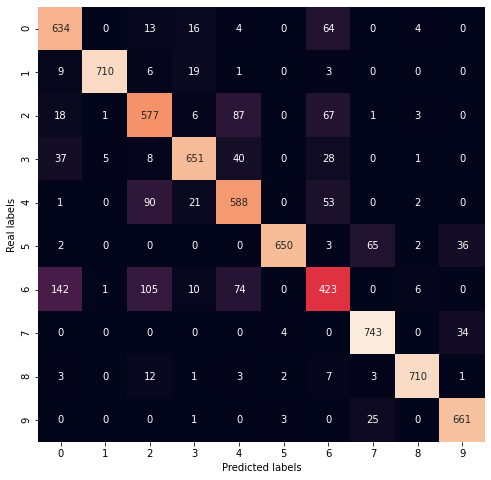

In [52]:
#Visualisation of the accuracy of the KNeighborsClassifier tuned model
KN_predict = grid_search.predict(X_test_pca_s)

visualisation = pd.crosstab(y_test, KN_predict, 
                               rownames=['Real labels'], colnames=['Predicted labels'])
plot = plt.figure(figsize=(8,8));
plot = sns.heatmap(visualisation, annot=True, fmt="d", cbar=False)

In [57]:
#Calculating average time for Nearest Neighbour gridsearch

mean_fit_time = grid_search.cv_results_['mean_fit_time']
mean_score_time= grid_search.cv_results_['mean_score_time']
n_splits  = grid_search.n_splits_ 
n_iter = pd.DataFrame(grid_search.cv_results_).shape[0] 
average_time = np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter

print("Average running time Nearest Neighbour gridsearch: {:.2f}".format(average_time))

Average running time for Nearest Neighbour gridsearch: 1360.23


### Bagging Classifier (Ensemble)

Bagging classifier was used in order to combine multiple models and provide an improved
accuracy result. However, after testing the tuned
Support Vector Machine, with different numbers of random estate and estimators as a large
number of estimators will probably provide better results but will take longer to run, the SVM
model provided the best performance with an accuracy of 89% on the training data and a
score of 90.05%

In [43]:
# DEFINING MODEL FOR ESSEMBLE
#SVM with grid search best parameters

rbf_svm = SVC(kernel="rbf", gamma=0.01, C = 10)
rbf_svm.fit(X_train_pca_s, y_train)
y_pred = rbf_svm.predict(X_test_pca_s)
print("SVM accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

SVM accuracy: 0.887


In [29]:
#ESSEMBLE METHOD

# Bagging with SVM model, using the best parameters of SVM

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator = rbf_svm, n_estimators=150,
bootstrap=True, random_state=5003, n_jobs=-1)
bagging.fit(X_train_pca_s, y_train)

y_predict = bagging.predict(X_test_pca_s)

from sklearn.metrics import accuracy_score

print("Bagging accuracy:")
print(accuracy_score(y_test, y_predict))

Bagging accuracy:
0.8889333333333334


In [ ]:
from sklearn.svm import SVC
grid_svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True, C=10, gamma=0.01, 
                              class_weight='balanced'))

from sklearn.ensemble import BaggingClassifier
classifier = OneVsRestClassifier(BaggingClassifier(grid_svm, n_estimators=131, 
                                            bootstrap=True, n_jobs=-1, random_state=5003))
classifier.fit(X_train_pca_s, y_train)
pred = classifier.predict(X_test_pca_s)

from sklearn.metrics import accuracy_score

print("Bagging accuracy:")
print(accuracy_score(y_test, pred))

In [30]:
#PREDICITON IN NEW DATA SET

#Predicting in the new provided test data
y_predict = bagging.predict(X_test_output_pca)

In [31]:
# Saving the predicted labels

output_df = pd.DataFrame(y_predict, columns = ['label'])
output_df.to_csv('C:/Users/ericp/OneDrive/Área de Trabalho/Machine Learning and Data Mining/Output/test_outputt.csv', 
                 sep=",", float_format='%d', index_label="id")

In [60]:
#COMPARING RESULTS

#Table with the tuned model results
from tabulate import tabulate

table = [["Model", "Accuracy with Hyperparameters", "Average Time"], 
         ["SVM Model",svm_hyper_score*100, svm_average_time], 
         ["KNeighborsClassifier",knear_hyper_score*100, average_time],  
         ["Logistic Regression",log_hyper_score*100, log_average_time]]
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════╤═════════════════════════════════╤════════════════╕
│ Model                │   Accuracy with Hyperparameters │   Average Time │
╞══════════════════════╪═════════════════════════════════╪════════════════╡
│ SVM Model            │                         88.68   │       54677.6  │
├──────────────────────┼─────────────────────────────────┼────────────────┤
│ KNeighborsClassifier │                         84.6267 │        1360.23 │
├──────────────────────┼─────────────────────────────────┼────────────────┤
│ Logistic Regression  │                         84.4133 │        3581.65 │
╘══════════════════════╧═════════════════════════════════╧════════════════╛


The SVM algorithm proves to be the best model for the most accurately predicted labels by
4%. Upon further inspection of the lowest and highest scores across the models reveals that
label 6 which represents the ‘Shirt’ category has been the most difficult to classify correctly
as it is commonly mistaken with Labels 0, 2 and 4; top, pullover and coat respectively (Refer
to Appendix C4: Confusion Matrix (kNN)). This is to be expected as these categories all
represent a similar type of clothing item covering the same section of the body and therefore
depicting a similar image. It is evident that the SVM model has a higher precision and recall
of predicting Label 6 which contributes to the overall higher accuracy rate.

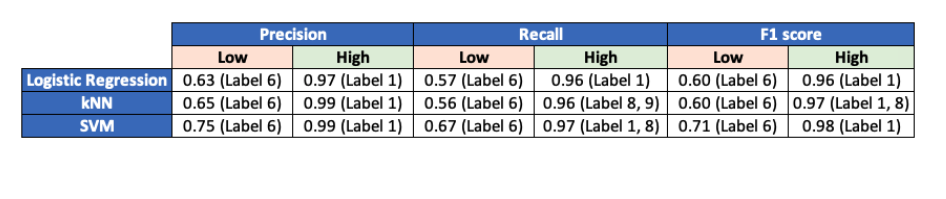

# Conclusion 

A review of the results post grid search from the three individual models used to predict the
clothing categories reveals that the Logistic Regression model and the kNN model both
performed at 85% accuracy, thereby making the clear winner to be the SVM model which
produced an accuracy score of 89%. The ensemble method Bagging Classifier was used to
improve the accuracy of the best model, however this was only a slight improvement (< 1%).
To improve the accuracy of the models, further enhancements could be made to identify
ways to isolate the categories that were most often incorrectly classified: top, pullover, coat
and shirt. Given the similarities amongst these clothing items it may be hard to classify these
correctly, however selecting a model and fine tuning it to best classify these similar
categories would increase the overall accuracy scores.
Therefore, the Bagging Classifier with SVM as the base model with C = 10,
gamma = 0.01 and kernel = rbf would be the best suited algorithm to produce the highest
score of accuracy for the Fashion-MNIST classification task.